In [1]:
from general_vxm_utils import *

full_train_file = '/home/vib9/src/SL-Net/jupyter/partitions/train.txt'
full_val_file = '/home/vib9/src/SL-Net/jupyter/partitions/val.txt'
scarce_train_file = '/home/vib9/src/SL-Net/jupyter/partitions/scarce_train.txt'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

target_label_numbers = [2.0, 3.0, 16.0, 41.0, 42.0]

In [2]:
"""
Setup vanilla UNet
"""

enc_nf = [128, 128, 128, 128]
dec_nf = [128, 128, 128, 128]

model1 = UNet(input_ch=1, 
              out_ch=6, 
              enc_nf=enc_nf, 
              dec_nf=dec_nf)

In [3]:
"""
Train the vanilla UNet just to make sure that we are alright with our model and data
"""
"""
train_soft1, val_scores1, train_vars1, val_vars1 = train_net(model1,
                                                            1,
                                                            32,
                                                            1e-4,
                                                            target_label_numbers,
                                                            train_path=full_train_file,
                                                            val_path=full_val_file)

save_results(model1, train_soft1, val_scores1, train_vars1, val_vars1, "default-train")
"""

'\ntrain_soft1, val_scores1, train_vars1, val_vars1 = train_net(model1,\n                                                            1,\n                                                            32,\n                                                            1e-4,\n                                                            target_label_numbers,\n                                                            train_path=full_train_file,\n                                                            val_path=full_val_file)\n\nsave_results(model1, train_soft1, val_scores1, train_vars1, val_vars1, "default-train")\n'

In [4]:
"""
Setup SLN UNet
"""

model2 = SLN_UNet(input_ch=1, 
                  out_ch=6, 
                  superblock_size=256, 
                  depth=4, 
                  W=None, 
                  b=None, 
                  train_block=True)

In [5]:
"""
Train the vanilla UNet just to make sure that we are alright with our model and data
"""
"""
train_soft2, val_scores2, train_vars2, val_vars2 = train_net(model2,
                                                        1,
                                                        32,
                                                        1e-4,
                                                        target_label_numbers,
                                                        train_path=full_train_file,
                                                        val_path=full_val_file)

save_results(model2, train_soft2, val_scores2, train_vars2, val_vars2, "sln")

np.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/sln_W", model2.super_block.W.cpu().data)
print("Saved weight to: /home/vib9/src/SL-Net/superlayer/models/superblocks/sln_W.npy!")
np.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/sln_b", model2.super_block.b.cpu().data)
print("Saved weight to: /home/vib9/src/SL-Net/superlayer/models/superblocks/sln_b.npy!")
"""

'\ntrain_soft2, val_scores2, train_vars2, val_vars2 = train_net(model2,\n                                                        1,\n                                                        32,\n                                                        1e-4,\n                                                        target_label_numbers,\n                                                        train_path=full_train_file,\n                                                        val_path=full_val_file)\n\nsave_results(model2, train_soft2, val_scores2, train_vars2, val_vars2, "sln")\n\nnp.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/sln_W", model2.super_block.W.cpu().data)\nprint("Saved weight to: /home/vib9/src/SL-Net/superlayer/models/superblocks/sln_W.npy!")\nnp.save("/home/vib9/src/SL-Net/superlayer/models/superblocks/sln_b", model2.super_block.b.cpu().data)\nprint("Saved weight to: /home/vib9/src/SL-Net/superlayer/models/superblocks/sln_b.npy!")\n'

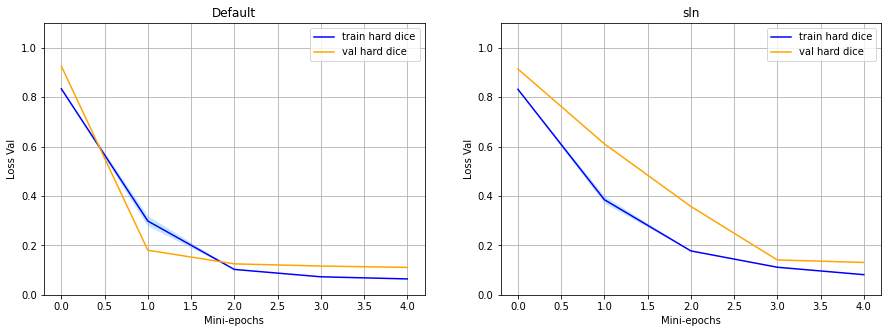

In [6]:
plot_subplot_array("default-train", 
                   "sln", 
                   [0, 1.1], 
                   ["Default", "sln"])

In [7]:
"""
Setup SLN UNet
"""
weight3 = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/sln_W.npy")
bias3 = np.load("/home/vib9/src/SL-Net/superlayer/models/superblocks/sln_b.npy")
 
model3 = SLN_UNet(input_ch=1, 
                  out_ch=6, 
                  superblock_size=256, 
                  depth=4, 
                  W=weight3, 
                  b=bias3, 
                  train_block=False,
                  retrain=True)

In [8]:
train_soft3, val_scores3, train_vars3, val_vars3 = train_net(model3,
                                                        1,
                                                        32,
                                                        1e-4,
                                                        target_label_numbers,
                                                        train_path=full_train_file,
                                                        val_path=full_val_file)

INFO: Creating dataset with 5865 examples
INFO: Creating dataset with 732 examples
Validation round:  97%|█████████▋| 713/732 [00:05<00:00, 134.15batch/s]
                                                                       INFO: Validation Dice Loss: 0.9498730037188713
Validation round:  99%|█████████▉| 728/732 [00:05<00:00, 185.00batch/s]
                                                                       INFO: Validation Dice Loss: 0.9468089283701757
Validation round:   9%|▊         | 64/732 [00:00<00:51, 12.91batch/s]


Validation round:  98%|█████████▊| 719/732 [00:05<00:00, 148.10batch/s]
                                                                       INFO: Validation Dice Loss: 1.0
Epoch 1/1:  58%|█████▊    | 3424/5865 [00:32<00:09, 262.28img/s, loss (batch)=0.819]Exception ignored in: <bound method NpzFile.__del__ of <numpy.lib.npyio.NpzFile object at 0x7f154c88dda0>>
Traceback (most recent call last):
  File "/nfs02/users/vib9/anaconda3/envs/sln/lib/python3.6/site-packages/numpy/lib/npyio.py", line 230, in __del__
    self.close()
  File "/nfs02/users/vib9/anaconda3/envs/sln/lib/python3.6/site-packages/numpy/lib/npyio.py", line 221, in close
    if self.zip is not None:
AttributeError: 'NpzFile' object has no attribute 'zip'
Epoch 1/1:  58%|█████▊    | 3424/5865 [00:33<00:23, 103.29img/s, loss (batch)=0.819]


KeyboardInterrupt: 

In [ ]:
model3.state_dict()